In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
test_path = "/content/drive/MyDrive/Veri Bilimi/Derin Öğrenme/Dog Breed Classification Global AI Hub/test/"
train_path = "/content/drive/MyDrive/Veri Bilimi/Derin Öğrenme/Dog Breed Classification Global AI Hub/train/"

In [ ]:
len(os.listdir(test_path))

10357

In [ ]:
len(os.listdir(train_path))

10222

In [ ]:
labels = pd.read_csv("/content/labels.csv")

In [ ]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


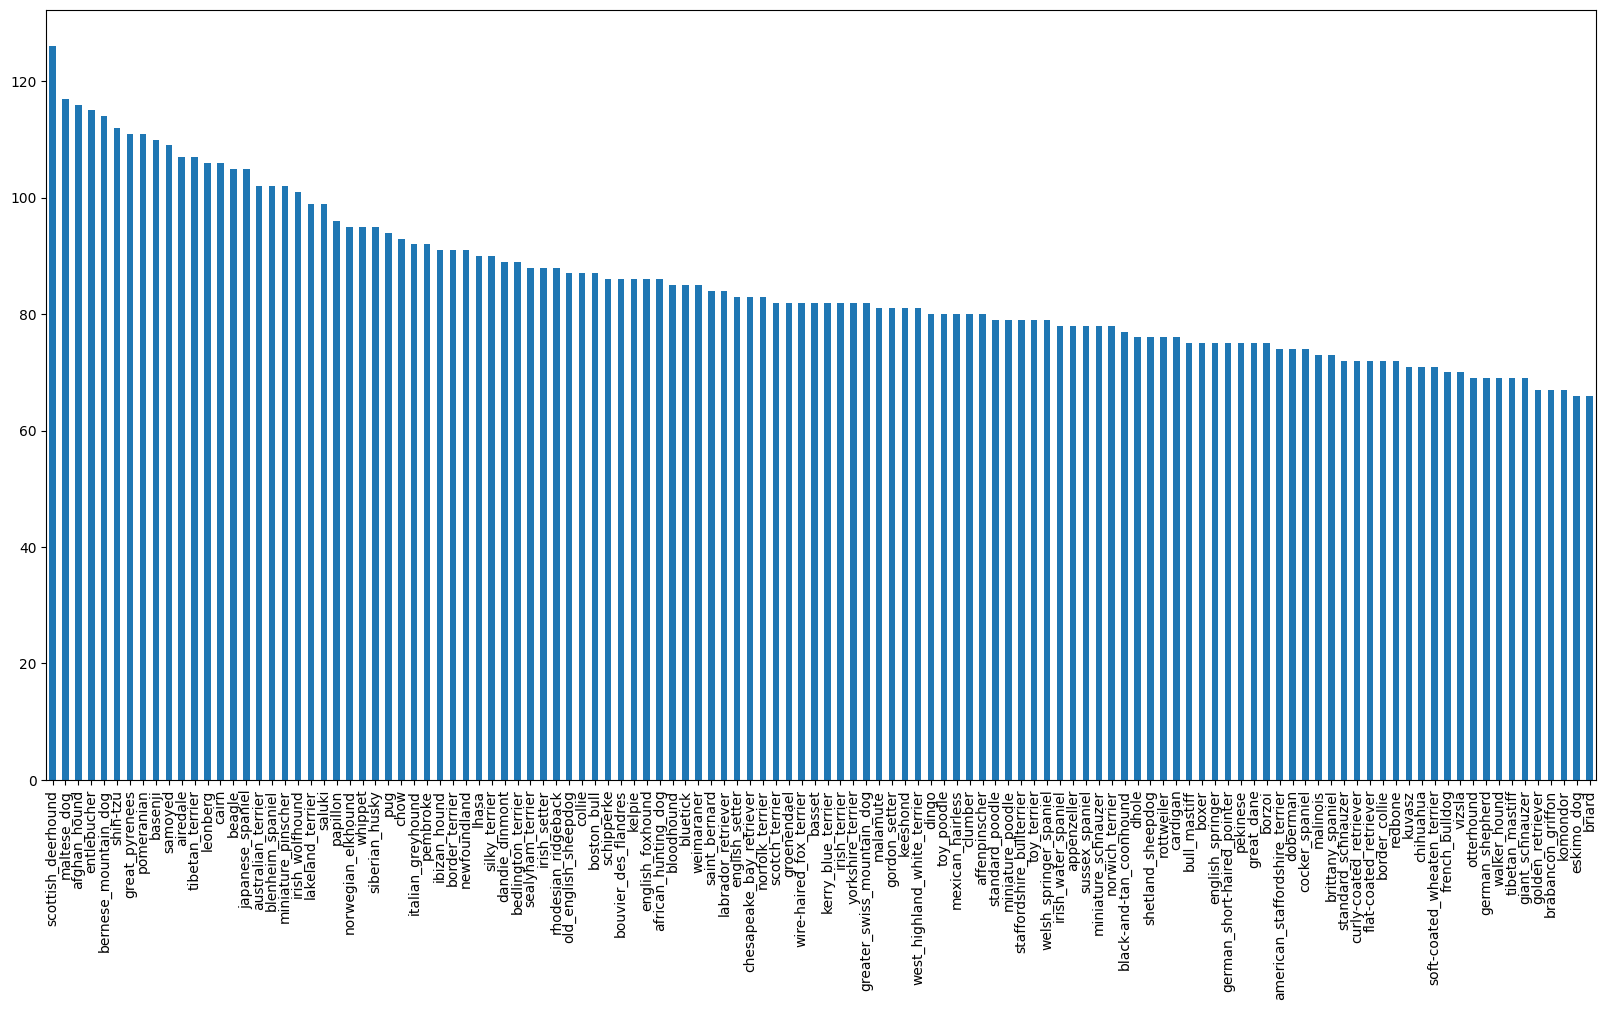

In [ ]:
labels["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels["breed"].value_counts().median()

82.0

In [ ]:
labels["filepath"] = ["/content/drive/MyDrive/Veri Bilimi/Derin Öğrenme/Dog Breed Classification Global AI Hub/train/" + fname + ".jpg" for fname in labels["id"]]
labels["filepath"][:10]

0    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
1    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
2    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
3    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
4    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
5    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
6    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
7    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
8    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
9    /content/drive/MyDrive/Veri Bilimi/Derin Öğr...
Name: filepath, dtype: object

In [ ]:
labels["breed"].value_counts().head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

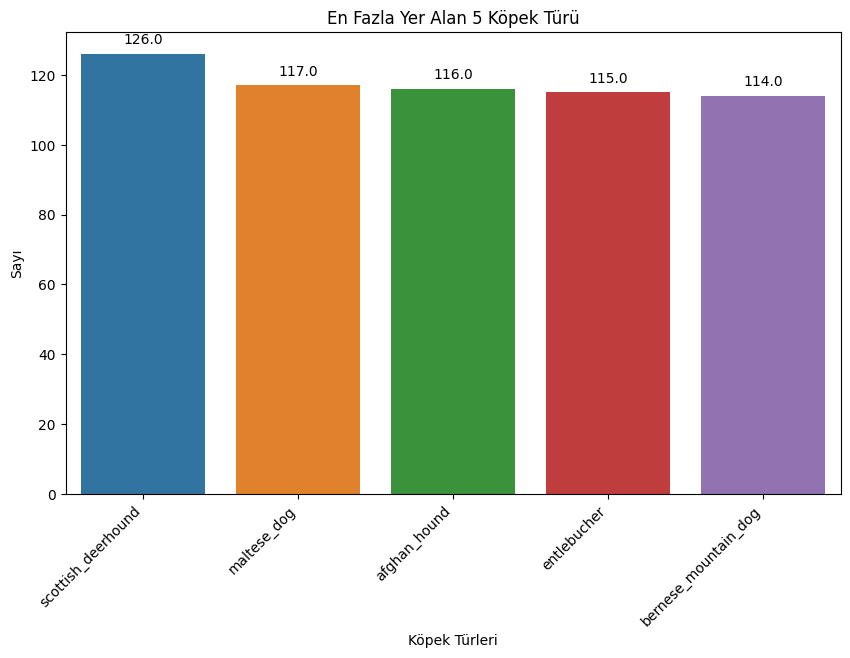

In [ ]:


# Veri setinde en çok yer alan 5 köpek türü
breed_counts = labels["breed"].value_counts().head()

#
sorted_breeds = breed_counts.index

#
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=labels["breed"], order=sorted_breeds)

# X,Y Label
plt.xlabel("Köpek Türleri")
plt.ylabel("Sayı")

# Title
plt.title("En Fazla Yer Alan 5 Köpek Türü")

# Okunabilirliğin artıtılması
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Değerlerin grafiğe eklenmesi
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


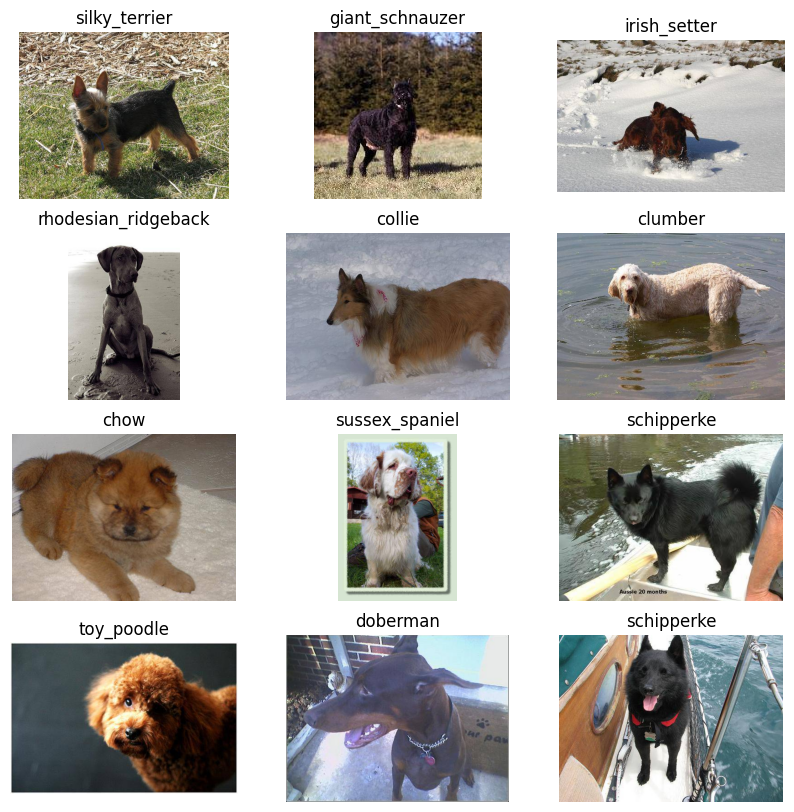

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    k = np.random.randint(0, len(labels))
    img = cv2.imread(labels.loc[k, 'filepath'])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(labels.loc[k, 'breed'])
    plt.axis('off')
plt.show()

#Data Preprocessing

In [ ]:
labels.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...


In [ ]:
refactor_size = 64
resized_image_list = []
all_paths = []

for i in range(len(labels)):
    # Her bir etiketin dosya yolunu al
    image_path = labels["filepath"].iloc[i]

    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    img_vals = tf.image.convert_image_dtype(img, tf.float32)
    imgarr = tf.keras.utils.img_to_array(img_vals)

    resized_image_list.append(imgarr)
    all_paths.append(image_path)

resized_image_list = np.asarray(resized_image_list)


In [ ]:
resized_image_list

In [ ]:
 resized_image_list.shape

In [ ]:
labels.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/drive/MyDrive/Veri Bilimi/Derin Öğr...


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
])
augmented_images = data_augmentation(resized_image_list)

In [ ]:
batch_size = 32  # Örnek bir batch boyutu
num_batches = len(resized_image_list) // batch_size

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

augmented_images = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_images = resized_image_list[start_idx:end_idx]
    augmented_batch = data_augmentation(batch_images)
    augmented_images.extend(augmented_batch)

# Eğer veri sayısı tam bölünmüyorsa, kalan verileri de işleyin
if len(resized_image_list) % batch_size != 0:
    remaining_images = resized_image_list[num_batches * batch_size:]
    augmented_remaining = data_augmentation(remaining_images)
    augmented_images.extend(augmented_remaining)

augmented_images = np.array(augmented_images)


In [ ]:
def show_25_images(images, labels):
  """
  Displays 25 images from data batch
  """
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i])
    breed = unique_labels[(labels[i].argmax())]
    plt.title(breed)
    plt.axis("off")

In [ ]:
labels["breed"]

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder oluşturun
label_encoder = LabelEncoder()

X = resized_image_list.copy()
y =  labels["breed"]

y_enconed = label_encoder.fit_transform(y)


In [ ]:
y_enconed

array([19, 37, 85, ...,  3, 75, 28])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enconed,random_state=30)
print(X_train.shape, y_train.shape)

(7666, 64, 64, 3) (7666,)


In [ ]:
model = models.Sequential([
    tf.keras.Input(shape=(64, 64, 3)),
    #data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(120, activation='softmax')
])

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train , validation_data=(X_test, y_test), epochs=60, callbacks=[checkpoint], batch_size=32)


Epoch 1/60
240/240 [==============================] - ETA: 0s - loss: 4.7872 - accuracy: 0.0094
Epoch 1: val_accuracy improved from -inf to 0.01135, saving model to best_model.h5
240/240 [==============================] - 73s 298ms/step - loss: 4.7872 - accuracy: 0.0094 - val_loss: 4.7772 - val_accuracy: 0.0113
Epoch 2/60
240/240 [==============================] - ETA: 0s - loss: 4.7148 - accuracy: 0.0150
Epoch 2: val_accuracy improved from 0.01135 to 0.01917, saving model to best_model.h5
240/240 [==============================] - 63s 263ms/step - loss: 4.7148 - accuracy: 0.0150 - val_loss: 4.6434 - val_accuracy: 0.0192
Epoch 3/60
240/240 [==============================] - ETA: 0s - loss: 4.5354 - accuracy: 0.0282
Epoch 3: val_accuracy improved from 0.01917 to 0.03091, saving model to best_model.h5
240/240 [==============================] - 66s 274ms/step - loss: 4.5354 - accuracy: 0.0282 - val_loss: 4.5288 - val_accuracy: 0.0309
Epoch 4/60
240/240 [==============================] - E